# Analyzing results

We will use python and this jupyter notebook to plot and analyze the results obtained from the
fortran source code.

## Plotting results

For this we will use the `numpy` and `matplotlib.pyplot` packages

In [1]:
# Importing numpy and matplotlib
import numpy as np 
import matplotlib.pyplot as plt

Different styles are predefined that give different appearance to the plots. This one emulates the style of the figures you'll find on statisical analysis news site fivethirtyeight.com

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
# reading data stored in results_basic.dat

file_name = 'results_basic.dat'

# loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
# we use skiprows=1 to avoid the header
all_data = np.loadtxt(file_name,skiprows=1)

# We transpose the array in order to be able to extract each column individually
all_data = all_data.transpose()
x_0 = all_data[0]
booles = all_data[1]
large_x0 = all_data[2]
monte_carlo = all_data[3]
monte_carlo_error = all_data[4]
# Each one of these is a numpy array that contains one of the columns in the results_basic.dat file.
# This will allow us to make operations on the extracted data

### Comparing Boole's quadrature and large $x_0$ approximation

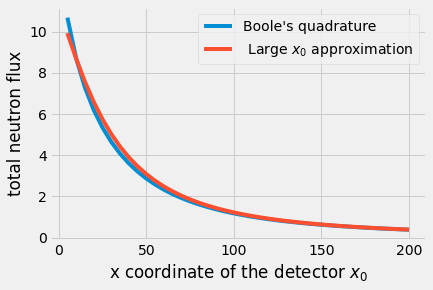

In [4]:
# The plot function can take two equally sized arrays,
# taking the first one as the x coordinates and the second one as the y coordinates
plt.plot(x_0, booles, label = "Boole's quadrature")
plt.plot(x_0, large_x0, label =' Large $x_0$ approximation')

plt.xlabel('x coordinate of the detector $x_0$')
plt.ylabel('total neutron flux')
# legend displays the labels given in each plot
plt.legend()
plt.show()

When are the Boole's quadrature and the large $x_0$ results similar and when are they different?

Where do the results start to diverge, and why? 

Provivde your answers in the cell bellow

#### Write your answer here!

### Comparing Boole's quadrature and Monte Carlo integration

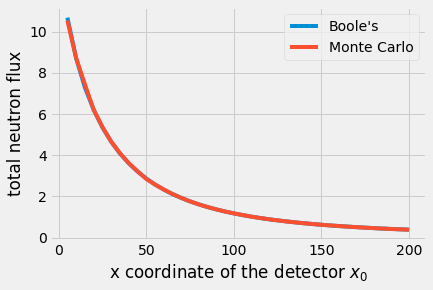

In [5]:
plt.plot(x_0, booles, label = "Boole's")
plt.plot(x_0, monte_carlo, label = 'Monte Carlo')
plt.xlabel('x coordinate of the detector $x_0$')
plt.ylabel('total neutron flux')
plt.legend()
plt.show()

Do you see any siginifant differences between both methods? To get a clearer picture let's plot their difference and compare it with the estimate of the statistical uncertainty

In [6]:
# Operations between arrays of the same size are applied element-wise
quadrature_difference = np.absolute(booles - monte_carlo)

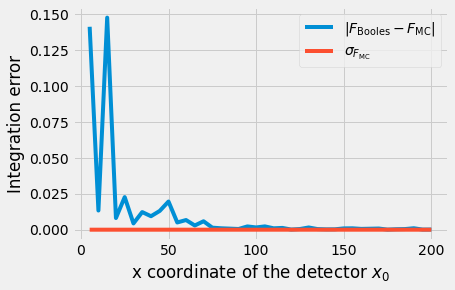

In [7]:
plt.plot(x_0, quadrature_difference, label = r'$|F_{\rm Booles} - F_{\rm MC}|$')
plt.plot(x_0, monte_carlo_error, label = r'$\sigma_{F_{\rm MC}}$')
plt.xlabel('x coordinate of the detector $x_0$')
plt.ylabel('Integration error')
plt.legend()
plt.show()

How does the difference between both methods compares to the estimate in the uncertainty?

Are they about the same size or is one significantly larger than the other?

Is the difference between the Boole's and Monte Carlo methods always smaller than the Monte Carlo error? Yes, No? 
Explain why in the cell bello

#### Give your answer here

## Advanced part of the project

### Reading the data from results file

In [8]:
# reading data stored in results_advanced.dat

file_name = 'results_advanced.dat'

# you should know how to do this by now.

all_data = np.loadtxt(file_name,skiprows=1)

all_data = all_data.transpose()
radius = all_data[0]
booles = all_data[1]
hollow_booles = all_data[2]
hollow_mc = all_data[3]
mc_error = all_data[4]

### Comparing Boole's and Monte Carlo when there's a hollow sphere inside the reactor

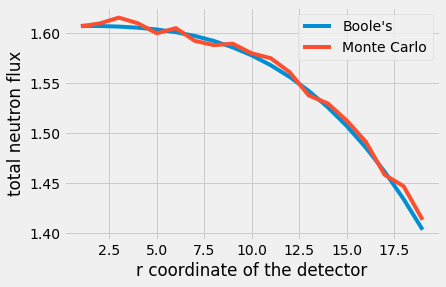

In [9]:
# plot Boole's result, Monte Carlo result and the Solid box with booles method
# as a function of the sphere's radius here
plt.plot(radius, hollow_booles, label = "Boole's")
plt.plot(radius, hollow_mc, label = 'Monte Carlo')
plt.xlabel('r coordinate of the detector')
plt.ylabel('total neutron flux')
plt.legend()
plt.show()

# you should know how to do this by now

Do the results of Boole's and Monte Carlo methods approach the solid reactor case when the radius of the hollow sphere get's small? Yes? No? Explain why in the cell bellow

#### Give your answer here

Finally, let's plot the difference between both methods and compare it with the error estimate 

In [10]:
# you should know how to do this by now
quadrature_difference = np.absolute(hollow_booles - hollow_mc)

If your calculation is correct the error in the Monte Carlo method should increase as the hollow sphere's radius increases. Can you explain why?

Because as r increases, the n_grid is increasing and the gap with error will increase.

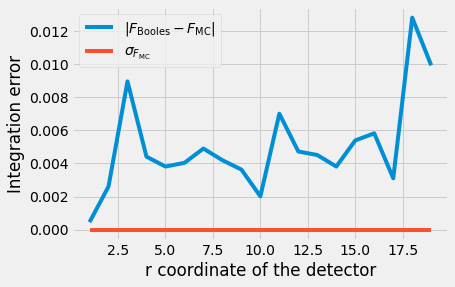

In [11]:
plt.plot(radius, quadrature_difference, label = r'$|F_{\rm Booles} - F_{\rm MC}|$')
plt.plot(radius, mc_error, label = r'$\sigma_{F_{\rm MC}}$')
plt.xlabel('r coordinate of the detector')
plt.ylabel('Integration error')
plt.legend()
plt.show()

#### Give your answer here